In [1]:
import os
from mayavi import mlab
from tvtk.tvtk_access import tvtk
import hermes
from hermes.analysis import CoverageAnalysis, LOSAnalysis
from hermes.constellations.O3b import O3b_00154
from hermes.objects import Satellite
from hermes.postprocessing import generate_pass_df, generate_gap_df
from hermes.scenario import Scenario
from hermes.simulation import Simulation
from hermes.util import hex2rgb

from astropy.coordinates import GCRS, CartesianRepresentation, ITRS, SphericalRepresentation

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from poliastro.bodies import Earth
from astropy import units as u, time
from notebooks.PlotUtil import apply_report_formatting

import cartopy.crs as ccrs

%matplotlib inline

mlab.init_notebook('ipy', local=True)

# PDF exporter defaults
ex = tvtk.GL2PSExporter()
ex.file_format = 'pdf'
ex.sort = 'bsp'
ex.compress = 1
#ex.edit_traits(kind='livemodal')

figures_dir = 'D:/git/thesis_report_ae/figures/visibility_analysis'

C:\git\hermes-simulator\cenv\lib\site-packages\astropy\units\decorators.py:222: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)


Notebook initialized with ipy backend.


### O3b 00154 spatial coverage
This runs a spatial coverage simulation and analysis at several altitudes using the
``hermes.analysis.CoverageAnalysis`` class.

In [2]:
def run_spatial_coverage_simulation():

    start = time.Time('2019-09-01 12:00:00.000', scale='tt')        # Start time of simulation
    stop = time.Time('2019-09-07 10:00:00.000', scale='tt')         # Stop time of simulation
    step = 1 * u.s

    scenario = Scenario(start, stop, step, hermes.objects.Earth, name='O3b_00154')

    # Make a new Satellite object and give it a cyan color
    sat_400_51 = Satellite.circular(hermes.objects.Earth.poli_body, 400 * u.km, inc=51.6 * u.deg, raan=0 * u.deg, arglat=0 * u.deg)
    sat_400_51.color = hex2rgb('#00ffff')
    sat_400_51.name = 'sat_400km_51deg'
    #sat_400_51.J2_perturbation = True

    sat_500_97 = Satellite.circular(hermes.objects.Earth.poli_body, 500 * u.km, inc=97.5 * u.deg, raan=0 * u.deg, arglat=0 * u.deg)
    sat_500_97.color = hex2rgb('#00ffff')
    sat_500_97.name = 'sat_500km_97deg'
    #sat_500_97.J2_perturbation = True

    # And we add it to the scenario
    scenario.add_satellite(sat_400_51)
    scenario.add_satellite(sat_500_97)

    # Constellation
    constellation = O3b_00154
    scenario.add_satellite(constellation)
    # Activate FOV
    import itertools
    for sat in itertools.islice(constellation, 80):
        sat.fov_3D_show = True

    # Add line-of-sight analysis
    analysis = CoverageAnalysis(scenario, constellation, altitude=1300 * u.km)
    scenario.add_analysis(analysis)

    analysis = CoverageAnalysis(scenario, constellation, altitude=1000 * u.km, )
    scenario.add_analysis(analysis)

    analysis = CoverageAnalysis(scenario, constellation, altitude=750 * u.km)
    scenario.add_analysis(analysis)

    analysis = CoverageAnalysis(scenario, constellation, altitude=500 * u.km)
    scenario.add_analysis(analysis)

    analysis = CoverageAnalysis(scenario, constellation, altitude=400 * u.km, dtheta=1 * u.deg, dphi=1 * u.deg)
    scenario.add_analysis(analysis)

    # analysis = CoverageAnalysis(scenario, constellation, altitude=200 * u.km)
    # scenario.add_analysis(analysis)

    # Initialise the scenario
    scenario.initialise()

    output_tuples = [None] * len(scenario.state.analyses)

    if not os.path.exists('raw_data'):
        os.makedirs('raw_data')

    for i, analysis in enumerate(scenario.state.analyses):
        writer = analysis.generate_writer(directory = 'raw_data')
        writer.initialise()
        writer.flush()
        output_tuples[i] = (writer.file_path, '%dkm' % analysis.altitude.to(u.km).value)
        del writer

    return output_tuples, scenario

from os import path
import pickle

if path.isfile('coverage_simulation.p'):
    coverage_list, scenario = pickle.load(open('coverage_simulation.p', 'rb'))
else:
    coverage_list, scenario = run_spatial_coverage_simulation()
    pickle.dump((coverage_list, scenario), open('coverage_simulation.p', 'wb'))

Initializing attractor
Initializing 44 satellites...
Initializing analysis 1 of 5...
Initializing analysis 2 of 5...
Initializing analysis 3 of 5...
Initializing analysis 4 of 5...
Initializing analysis 5 of 5...


In [27]:
# Not working in Pycharm, but works in the browser

vis = scenario.visualise3D()
vis.figure

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x04\xb0\x08\x02\x00\x00\x00dC$\x98\x…

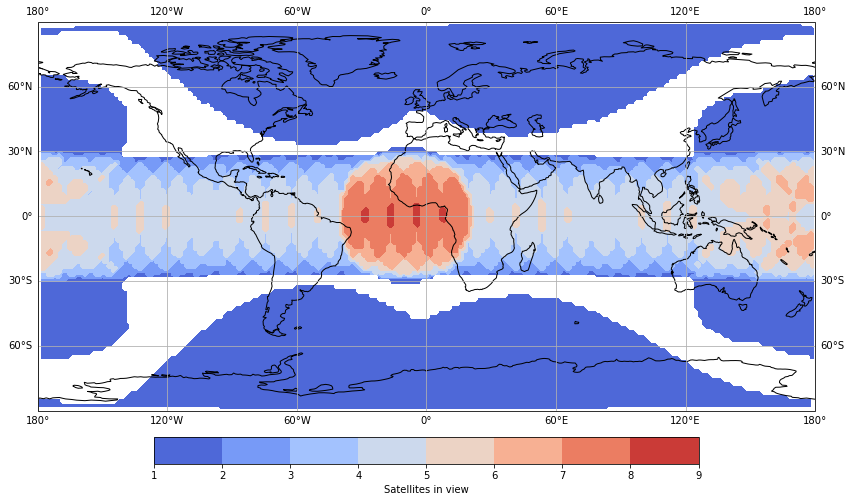

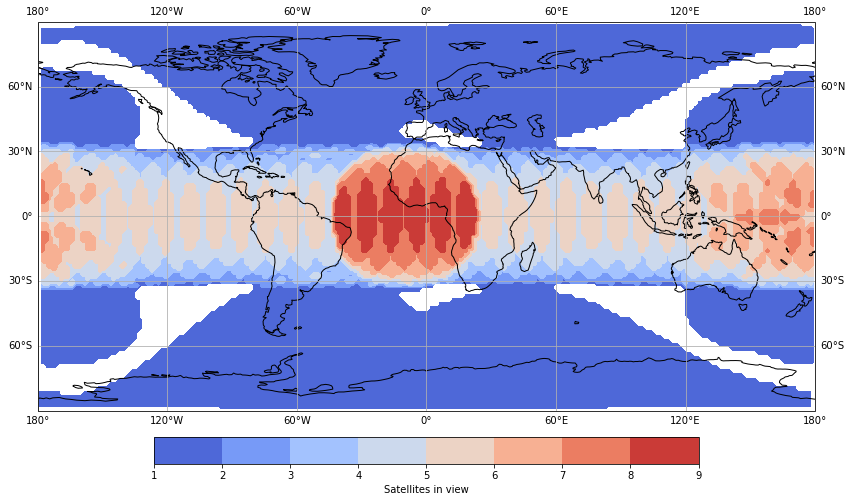

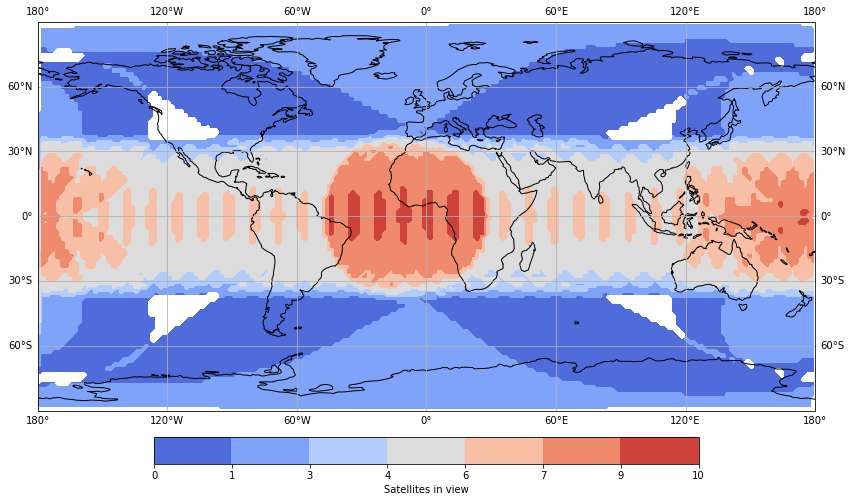

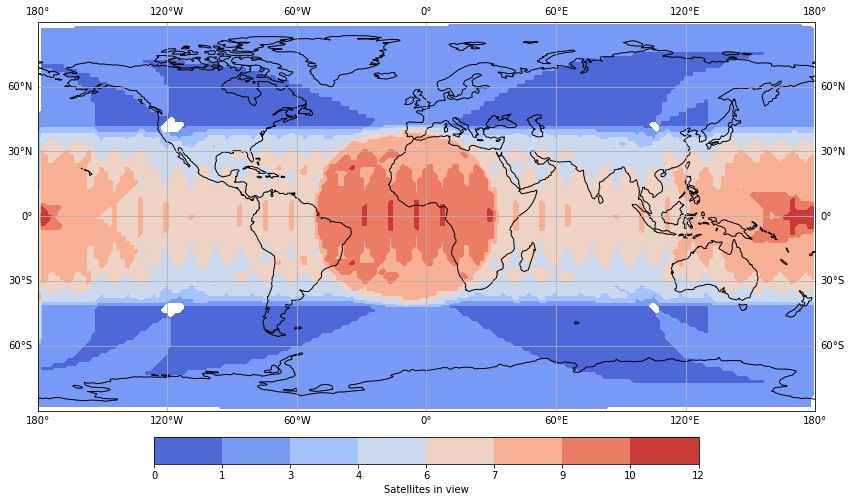

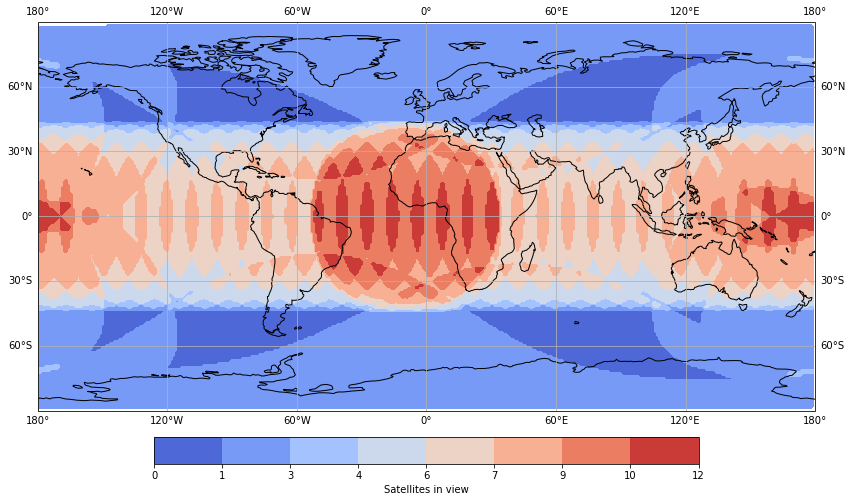

In [3]:
from visibility_analysis.plotting import *

for coverage_item in coverage_list:
    columns = ['tof', 'r_x', 'r_y', 'r_z', 'num_los']
    store = pd.HDFStore(coverage_item[0])
    coverage_df = store.select('coverage', 'columns = %s' % str(columns))
    plot_coverage_spatial(coverage_df)
    plt.savefig(figures_dir + '/O3b_00154_spatial_coverage_%s.pdf' % coverage_item[1])
    plt.show()

### O3b 00154 Contact simulation

In [4]:
if False:
    start = time.Time('2019-09-01 10:00:00.000', scale='tt')        # Start time of simulation
    stop = time.Time('2019-09-07 10:00:00.000', scale='tt')         # Stop time of simulation
    step = 1 * u.s

    scenario = Scenario(start, stop, step, hermes.objects.Earth, name='O3b_00154')

    # Make a new Satellite object and give it a cyan color
    sat_400_51 = Satellite.circular(hermes.objects.Earth.poli_body, 400 * u.km, inc=51.6 * u.deg, raan=0 * u.deg, arglat=0 * u.deg)
    sat_400_51.color = hex2rgb('#00ffff')
    sat_400_51.name = 'sat_400km_51deg'
    #sat_400_51.J2_perturbation = True

    sat_500_97 = Satellite.circular(hermes.objects.Earth.poli_body, 500 * u.km, inc=97.5 * u.deg, raan=0 * u.deg, arglat=0 * u.deg)
    sat_500_97.color = hex2rgb('#00ffff')
    sat_500_97.name = 'sat_500km_97deg'
    #sat_500_97.J2_perturbation = True

    # And we add it to the scenario
    scenario.add_satellite(sat_400_51)
    scenario.add_satellite(sat_500_97)

    # Add the constellation
    constellation = O3b_00154
    scenario.add_satellite(constellation)

    # Add line-of-sight analysis
    scenario.add_analysis(LOSAnalysis(scenario, sat_400_51, constellation))
    scenario.add_analysis(LOSAnalysis(scenario, sat_500_97, constellation))

    # Initialise the scenario
    scenario.initialise()

    simulation = Simulation(scenario, show_3d=False)
    simulation.run()

Initializing attractor
Initializing 44 satellites...
Initializing analysis 1 of 2...
Initializing analysis 2 of 2...


Simulation progress: 100%|██████████| 518400/518400 [11:08<00:00, 775.25it/s] 


In [9]:
columns = ['strand_name', 'tof', 'r_a_x', 'r_a_y', 'r_a_z', 'r_b_x', 'r_b_y', 'r_b_z']

store_500km = pd.HDFStore("2021-02-18_18-58-07_O3b_00154_LOSAnalysis_sat_500km_97deg_to_node.h5")
instances_500km_df = store_500km.select('contact_instances', 'columns = %s' % str(columns))

In [10]:
store_400km = pd.HDFStore("2021-02-18_18-58-02_O3b_00154_LOSAnalysis_sat_400km_51deg_to_node.h5")
instances_400km_df = store_400km.select('contact_instances', 'columns = %s' % str(columns))

In [11]:
pass_500km_df = generate_pass_df(instances_500km_df)
gaps_500km_df = generate_gap_df(instances_500km_df)

pass_400km_df = generate_pass_df(instances_400km_df)
gaps_400km_df = generate_gap_df(instances_400km_df)

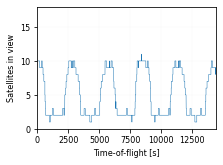

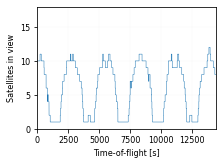

In [18]:
def contact_timeline(pass_df):
    fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))

    tof_max = (4 * u.hour).to(u.s).value

    tofs = np.arange(tof_max)

    def satellites_in_view(pass_df, tofs):
        num_in_view = np.zeros((len(tofs), ))
        for i, tof in enumerate(tofs):
            in_view = (pass_df['start_tof'] <= tof) & (tof <= pass_df['end_tof'])
            num_in_view[i] = in_view.sum()
        return num_in_view

    ax.step(tofs, satellites_in_view(pass_df, tofs), linewidth=0.5)
    ax.set_xlim((0, tof_max))
    ax.set_ylim((0, 18))
    ax.set_xlabel('Time-of-flight [s]')
    ax.set_ylabel('Satellites in view')
    ax.grid(linestyle=':', linewidth = 0.1)
    apply_report_formatting()

    #plt.show()

contact_timeline(pass_500km_df)
plt.savefig(figures_dir + '/O3b_00154_in_view_500km97deg.pdf')
plt.show()

contact_timeline(pass_400km_df)
plt.savefig(figures_dir + '/O3b_00154_in_view_400km51deg.pdf')
plt.show()

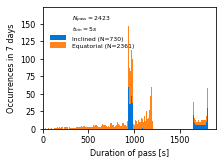

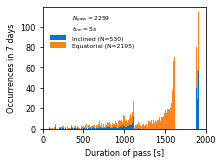

In [38]:
def plot_pass_temporal_distribution(pass_df, bin_size = 5.0):

    durations_np = pass_df.duration.to_numpy()

    bins = int(np.max(durations_np))
    bins = int(bins / bin_size) # x second bins
    count = len(durations_np)

    fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))

    ax.plot(np.NaN, np.NaN, '-', color='none', label='$N_{pass} = %d$' % (count))
    ax.plot(np.NaN, np.NaN, '-', color='none', label='$t_{bin} = %ds$' % (bin_size))

    # Split into polar and inclined orbits
    sat_b_num = pass_df.strand_name.str.split(' to ').str[-1].astype(int)
    inc_sat = (sat_b_num > 2) & ((sat_b_num < 7) | (sat_b_num > 39))
    equ_sat = (sat_b_num > 2) & ((sat_b_num >= 7) | (sat_b_num <= 41))

    durations_np = [durations_np[inc_sat.values], durations_np[equ_sat.values]]

    n, bins, patches = ax.hist(durations_np,
                               bins=bins,
                               histtype='bar',
                               stacked=True,
                               color=["#0074D9", "#FF851B"],
                               label=['Inclined (N=%d)' % inc_sat.sum(),
                                      'Equatorial (N=%d)' % equ_sat.sum()])

    ax.set_xlabel('Duration of pass [s]')
    ax.set_ylabel('Occurrences in 7 days')
    ax.set_xlim((0, ax.get_xlim()[1]))

    ax.legend(loc='upper left', frameon=False, labelspacing=0.1, fontsize=8)
    ax.set_ylim((-0.1, ax.get_ylim()[1]))

    return ax

ax = plot_pass_temporal_distribution(pass_500km_df, bin_size=5)
# ax.set_xlim((0, 2500))
# ax.set_ylim((0, 225))

apply_report_formatting()
plt.savefig(figures_dir + '/O3b_00154_pass_distribution_500km97deg.pdf')
plt.show()

ax = plot_pass_temporal_distribution(pass_400km_df, bin_size=5)
# ax.set_xlim((0, 2500))
# ax.set_ylim((0, 150))

apply_report_formatting()
plt.savefig(figures_dir + '/O3b_00154_pass_distribution_400km51deg.pdf')
plt.show()

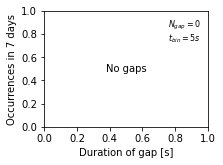

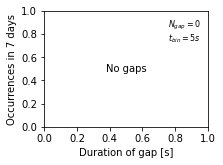

In [39]:
def plot_gap_temporal_distribution(gaps_df, bin_size = 5.0):

    durations_np = gaps_df.duration.to_numpy()
    count = len(durations_np)

    fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))

    ax.plot(np.NaN, np.NaN, '-', color='none', label='$N_{gap} = %d$' % (count))
    ax.plot(np.NaN, np.NaN, '-', color='none', label='$t_{bin} = %ds$' % (bin_size))

    ax.set_xlabel('Duration of gap [s]')
    ax.set_ylabel('Occurrences in 7 days')
    ax.legend(loc='upper right', frameon=False, labelspacing=0.1, fontsize=8)

    if len(durations_np) == 0:
        ax.text(0.5, 0.50,
            'No gaps',
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes)
        ax.set_xlim((0,1))
        ax.set_ylim((0,1))

        return

    bins = int(np.max(durations_np))
    bins = int(bins / bin_size) # x second bins

    n, bins, patches = ax.hist(durations_np,
                               bins=bins,
                               stacked=True,
                               color = "tab:orange",
                               lw=0,
                               label='Gaps')


    ax.set_xlim((0, np.max(durations_np)))

    average = np.average(durations_np)
    std_dev = np.std(durations_np)
    ax.set_ylim((-0.1, ax.get_ylim()[1]))


plot_gap_temporal_distribution(gaps_500km_df)
plt.savefig(figures_dir + '/O3b_00154_gap_distribution_500km97deg.pdf')
plt.show()

plot_gap_temporal_distribution(gaps_400km_df)
plt.savefig(figures_dir + '/O3b_00154_gap_distribution_400km51deg.pdf')
plt.show()

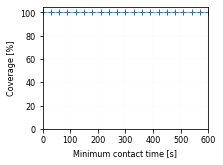

15s, 100.0%
30s, 100.0%
60s, 100.0%
150s, 100.0%
300s, 100.0%
600s, 100.0%


15s, 99.9%
30s, 99.9%
60s, 99.9%
150s, 99.9%
300s, 99.7%
600s, 98.7%




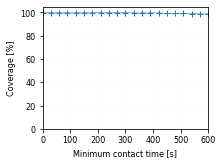

In [49]:
def plot_temporal_coverage(instances_df, pass_df, tof_end = None, min_durations=np.arange(0, 315, 15)):

    if tof_end is None:
        tof_end = max(instances_df['tof'])

    percentages = np.zeros((len(min_durations),))

    for i, min_duration in enumerate(min_durations):

        # First we find which passes are long enough to include:
        long_passes = pass_df[pass_df.duration >= min_duration]

        # And use that to filter the instances
        long_instances_df = instances_df[instances_df.index.isin(long_passes.index, level='p')]

        if long_instances_df.size > 0:
            # Then we compute the gaps
            long_gap_df = generate_gap_df(long_instances_df, tof_end=tof_end)

            # Then we compute the total gap duration
            total_gap_duration = long_gap_df[long_gap_df['end_tof'] <= tof_end].duration.sum()

            # And compute the coverage percentage
            percentages[i] = 1 - min(1, total_gap_duration / tof_end)
        else:
            percentages[i] = 0

    ## DO PLOTTING
    fig, ax = plt.subplots(tight_layout=True, figsize=(3.2, 2.4))
    ax.plot(min_durations, percentages * 100, '-+', linewidth=0.5)
    ax.set_xlabel('Minimum contact time [s]')
    ax.set_ylabel('Coverage [%]')
    ax.grid(linestyle=':', linewidth=0.1)
    ax.set_xlim((0, max(min_durations)))
    ax.set_ylim((0, 105))
    apply_report_formatting()

    return min_durations, percentages

min_durations, percentages = plot_temporal_coverage(instances_500km_df, pass_500km_df, min_durations=np.arange(0, 630, 30))
plt.savefig(figures_dir + '/O3b_00154_coverage_vs_time_500km97deg.pdf')
plt.show()

interp_durations = [15, 30, 60, 150, 300, 600]
interp_percentages = np.interp(interp_durations, min_durations, percentages)

for d, p in zip(interp_durations, interp_percentages):
    print("%ds, %0.1f%%" % (d, p * 100))
print("\n")


min_durations, percentages = plot_temporal_coverage(instances_400km_df, pass_400km_df, min_durations=np.arange(0, 630, 30))
plt.savefig(figures_dir + '/O3b_00154_coverage_vs_time_400km51deg.pdf')
plt.show()

interp_percentages = np.interp(interp_durations, min_durations, percentages)

for d, p in zip(interp_durations, interp_percentages):
    print("%ds, %0.1f%%" % (d, p * 100))
print("\n")